In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [17]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [18]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [19]:
'{:%B %Y}'.format(curr_month)

'October 2018'

<h2>Основная таблица</h2>

In [24]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2018

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31     2477   1881         32   5   0     1     74     136      12
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [21]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-10-31      155    322         -8  -2   0     5      2      32       3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

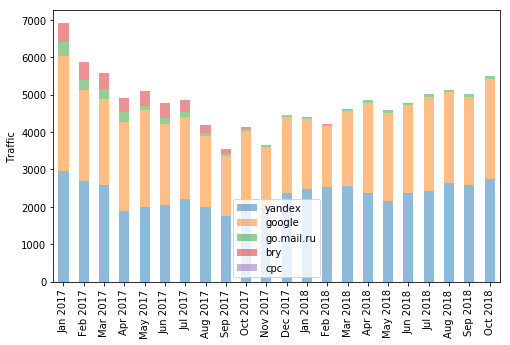

In [25]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

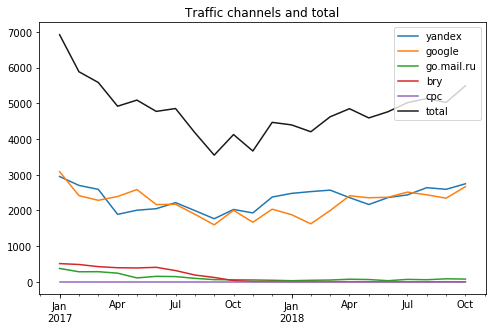

In [26]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [27]:
kw = 'keyword visit'.split()

In [28]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)     77
google     0                                         дешевые двери    293
           1                                          двери дешево    244
           2                                       двери из дерева    219
           3                             np - /?cnt=catalog&r=2438    164
           4                             np - /?cnt=catalog&r=1428    154
           5                                      np - /?pid=pokaz     85
           6                                                np - /     67
           7                                         двери продажа     62
           8                                         полотно двери     29
           9                                дверное полотно дешево     18
           10                            np - /?cnt=catalog&r=1049     13
           11                               дверные полотна купить     12
           12                                      полотна дверные     12
           13                                   np - /?pid=contact      8
           14                                            (not set)      6
           15                            np - /?cnt=catalog&r=1792      5
           16                             np - /?cnt=catalog&r=448      5
           17                             np - /?cnt=catalog&r=525      5
           18                                       двери в ванную      5
           19                                 дверное полотно цена      5
           20                            np - /?cnt=catalog&r=1203      4
           21                              np - /?pid=menu-katalog      4
           22                                     двери с коробкой      4
           23                                      дверное полотно      4
           24                            np - /?cnt=catalog&r=3124      3
           25                             np - /?cnt=catalog&r=473      3
           26                                  np - /?pid=dostavka      3
           27                                 полотно двери купить      3
           28                            np - /?cnt=catalog&r=1473      2
...                                                            ...    ...
yandex     2297  двери модель 26 терминус ясень crema эмаль глухое      1
           2298              двери модель прованс до 8 белая эмаль      1
           2299                           двери модерн эмаль белая      1
           2300     двери молочный цвет каталог дверей двери эмаль      1
           2301                    двери на кухне в интерьере фото      1
           2302          двери на кухне которые прячутся во внутрь      1
           2303               двери на кухне открываются две сразу      1
           2304                         двери на кухне с газлифтом      1
           2305           двери на кухню 70 на 200 купить недорого      1
           2306                      двери на кухню в леруа мерлен      1
           2307                           двери на кухню в люблино      1
           2308                       двери на кухню в однушке п44      1
           2309                              двери на кухню в офис      1
           2310                            двери на кухню гармошка      1
           2311                двери на кухню гармошка фото и цены      1
           2312     двери на кухню двери на кухню дизайн фото цены      1
           2313  двери на кухню дверь для кухни рекомендации по...      1
           2314                      двери на кухню дверь на кухню      1
           2315  двери на кухню дверь на кухню со стеклом склад...      1
           2316                    двери на кухню дизайн фото цены      1
           2317                          двери на кухню и в ванную      1
           2318             двери на кухню из узкого коридора фото      1
           2319  двери на кухню как выбрать межкомнатные двери 

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [29]:
data[kw].xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),77
google,дешевые двери,293
rambler,купить дверное полотно,1
yandex,(not set),81


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [30]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                        (not set)     77
google     0                    дешевые двери    293
           1                     двери дешево    244
           2                  двери из дерева    219
           3        np - /?cnt=catalog&r=2438    164
           4        np - /?cnt=catalog&r=1428    154
rambler    0           купить дверное полотно      1
           1   украина купить дверное полотно      1
yandex     0                        (not set)     81
           11                 дверное полотно     32
           12     купить арку в дверной проем     22
           13                  двери на кухню     18
           14                  кухонные двери     15